In [3]:
import pandas as pd

# 读取数据
df = pd.read_excel('grouped_user_work_records.xlsx')

# 提取fandom信息（假设fandom标识在work_ids末尾，如'sw'、'st'、'mv'等）
df['fandom'] = df['work_ids'].str.extract(r'(\D+)$')

# 2. Fandom频次统计
fandom_counts = df['fandom'].value_counts()
print(fandom_counts)

# 3. 用户行为分析
# 每个用户平均关联的作品数量
user_work_counts = df.groupby('user')['work_ids'].count()
print(user_work_counts.describe())

# 4. 作品分布分析
# 每个fandom中独立作品的数量
work_counts = df.groupby('fandom')['work_ids'].nunique()
print(work_counts)

hp    30966
dc    20397
mv    19808
sw    17594
st    15070
Name: fandom, dtype: int64
count    103835.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: work_ids, dtype: float64
fandom
dc    10518
hp    13510
mv     7879
st     7336
sw     6529
Name: work_ids, dtype: int64


Table saved as image to /Users/mykilee/Desktop/fandom_analysis.png


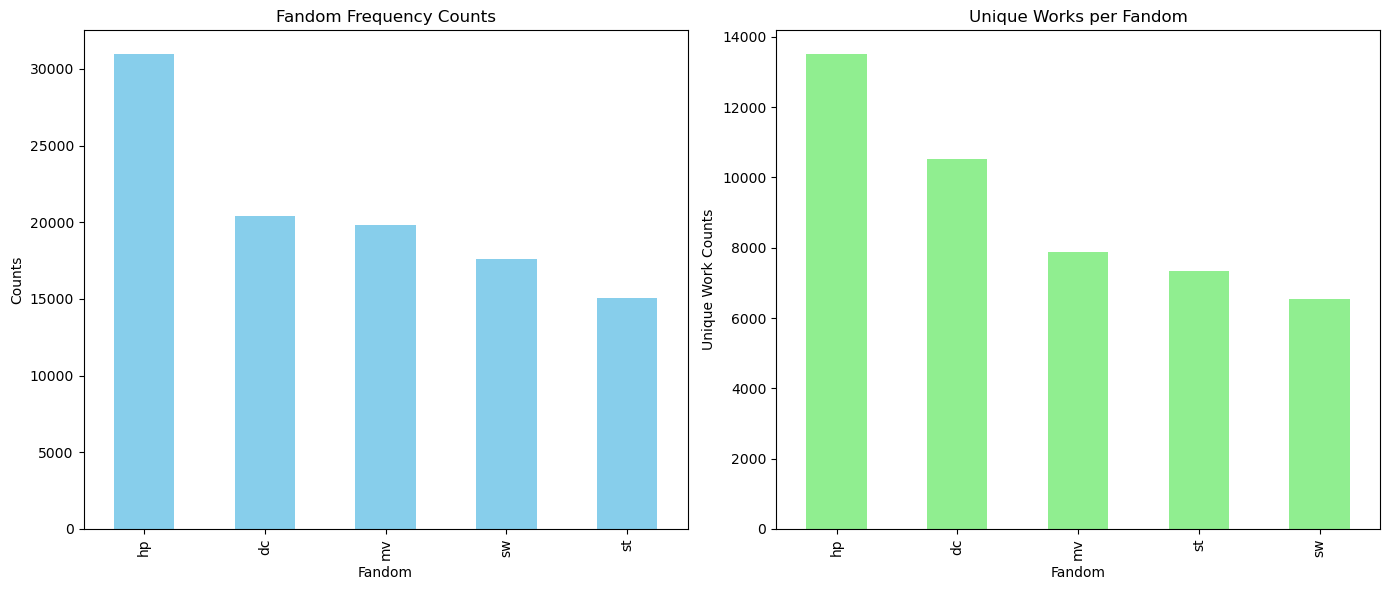

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 数据
fandom_counts = pd.Series({
    'hp': 30966,
    'dc': 20397,
    'mv': 19808,
    'sw': 17594,
    'st': 15070
})

work_counts = pd.Series({
    'hp': 13510,
    'dc': 10518,
    'mv': 7879,
    'st': 7336,
    'sw': 6529
})

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Fandom频次统计柱状图
fandom_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Fandom Frequency Counts')
axs[0].set_xlabel('Fandom')
axs[0].set_ylabel('Counts')

# 独立作品数量柱状图
work_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Unique Works per Fandom')
axs[1].set_xlabel('Fandom')
axs[1].set_ylabel('Unique Work Counts')

# 调整布局
plt.tight_layout()

# 获取桌面路径
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# 保存图片到桌面
output_path = os.path.join(desktop_path, 'fandom_analysis.png')
plt.savefig(output_path, dpi=300)

# 显示保存路径
print(f"Table saved as image to {output_path}")

# 显示图片
plt.show()